In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



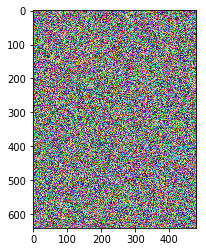

In [35]:
# generar una imagen COMPLETAMENTE aleatoria!
random_image = np.random.random((640,480,3))
plt.imshow(random_image)

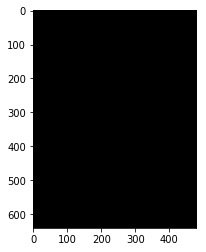

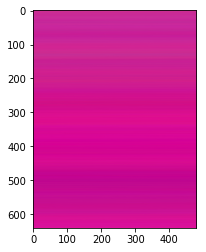

In [37]:
# Generar una imagen aleatoria perturbando un color de a franjas

perturbed_image = np.zeros((640,480,3)) # generamos una imagen en negro
h,w,c=perturbed_image.shape
plt.imshow(perturbed_image)# la mostramos

pixel_color=np.array([0.8,0.2,0.6]) #Color inicial para el primer pixel 
# recorremos los pixeles de la imagen uno a uno. 
for i in range(h):
    for j in range(w):
        # para cada pixel, tomamos el color anterior (almacenado en last)
        # y perturbamos sus valores de r, g y b para generar un color ligeramente distinto. 
        
        for k in range(c):
            perturbation=np.random.rand() #generamos una perturbación aleatoria entre 0 y 1
            perturbation-=0.5 # le restamos 0.5 para que quede entre -0.5 y 0.5
            perturbation= perturbation /1500 # la hacemos más chiquita
            
            #le aplicamos la perturbación al pixel
            # el %1 es para que si se va del intervalo 0-1 vuelva a ese intervalo
            pixel_color[k]= (pixel_color[k]+perturbation ) % 1 
            perturbed_image[i,j,k]=pixel_color[k]
            
plt.figure()# mostramos la imagen aleatoria generada
plt.imshow(perturbed_image)

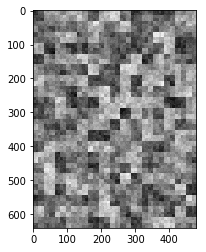

In [80]:
turbulence_image=np.zeros((640,480))
noise_image = np.random.random(turbulence_image.shape)
h,w=turbulence_image.shape

       
import numba #usamos numba para que sea más rápido

@numba.jit #pre-compilamos la función a código de máquina para que sea más rápida
def turbulence(x,y,initial_turbulence,noise_image):    
    x=float(x)
    y=float(y)
    value = 0.0
    turbulence=initial_turbulence
    while (turbulence>=1):
        value += noise_image[int(x / turbulence), int(y / turbulence)] * turbulence;
        turbulence /= 2.0;
    
    return (128.0 * value / initial_turbulence)

size=32
# recorremos los pixeles de la imagen uno a uno. 
for i in range(h):
    for j in range(w):
            turbulence_image[i,j]=turbulence(i,j,size,noise_image)
    
plt.imshow(turbulence_image,cmap=plt.get_cmap('gray'))




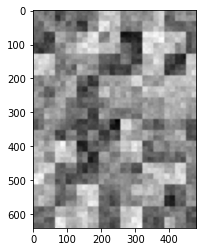

In [107]:
# Generate a color turbulence image
@numba.jit
def generate_turbulence_image(h,w,initial_turbulence):
    noise_image=np.random.random((h,w))
    turbulence_image=np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            turbulence_image[i,j]=turbulence(i,j,initial_turbulence,noise_image)
    return turbulence_image

@numba.jit
def smooth_image_gray(image):    
    image_smooth=np.copy(image)

    for i in range(1,h-1):#evitamos los bordes
        for j in range(1,w-1): #evitamos los bordes
            image_smooth[i,j]= (image[i-1,j-1]+image[i-1,j]+image[i-1,j+1]
                                  +image[i,j-1]+image[i,j]+image[i,j+1]
                                  +image[i+1,j-1]+image[i+1,j]+image[i+1,j+1]
                                   )/9
    return image_smooth

h,w=(640,480)
initial_turbulence=64
turbulence_image = generate_turbulence_image(h,w,initial_turbulence)
turbulence_image_smoothed = smooth_image_gray(turbulence_image)
turbulence_image_smoothed = smooth_image_gray(turbulence_image_smoothed)
turbulence_image_smoothed = smooth_image_gray(turbulence_image_smoothed)
turbulence_image_smoothed = smooth_image_gray(turbulence_image_smoothed)
turbulence_image_smoothed = smooth_image_gray(turbulence_image_smoothed)

plt.imshow(turbulence_image_smoothed,cmap=plt.get_cmap('gray'))
plt.figure()
